In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 程序说明

    这个程序可以画出一个债券所有时期的价格。下面每一个定理的验证按照指示操作即可，需要输入债券的期数，建议20。

In [2]:
Price=[]
def cash_flow(t,r,i,C):
    global Price
    if t==0:
        Price.append(C)
        return
    #cash=[]
    I=0
    for k in range(1,t+1):
        I=I+C*r/pow((1+i),k)
        #cash.append(I)
    total=I+C/pow((1+i),k)
    #cash.append(total)
    Price.append(total)
    return cash_flow(t-1,r,i,C)

def cash_flow_1(t,r,i,C):
    Price=[]
    cash_flow(t,r,i,C)
    return Price

In [15]:
Price=[]
cash_flow(30,0.009,0.01,100)

# 定理一：市场价格与到期收益率成反比

# 定理二：收益率下降带来的利润大于上升带来的损失

### 1. 可视化
    需要使用者输入债券的数量，程序会根据债券的数量将到期收益率在0-1之间等分。债券的其他参数也可以调整，在下面的程序前四行调整即可。
    
    第一张图Y轴代表债券价格，X轴代表期限（越大到期越近），不同曲线代表不同到期收益率。
    第二张图为期初价格与到期收益率的关系，相当于市第一张图在x=0的时候的截面展示。

请输入实验的债券数量：20
基本信息：期数30，票面利率0.05，面值100。


Text(0.5, 1.0, 'Price of Bonds at T0 with Different YTM')

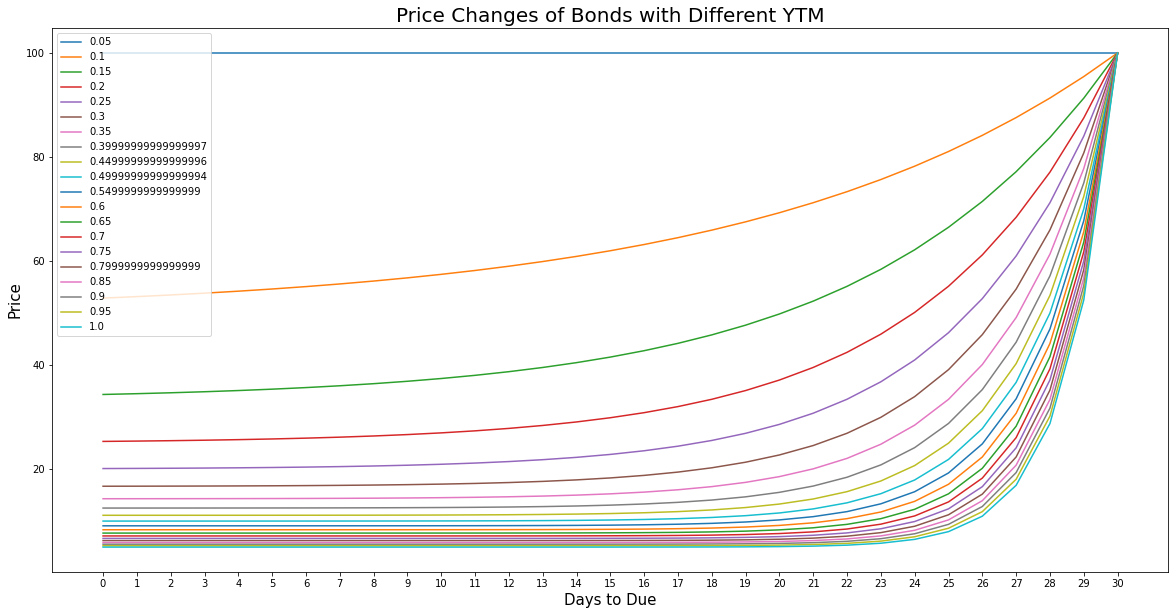

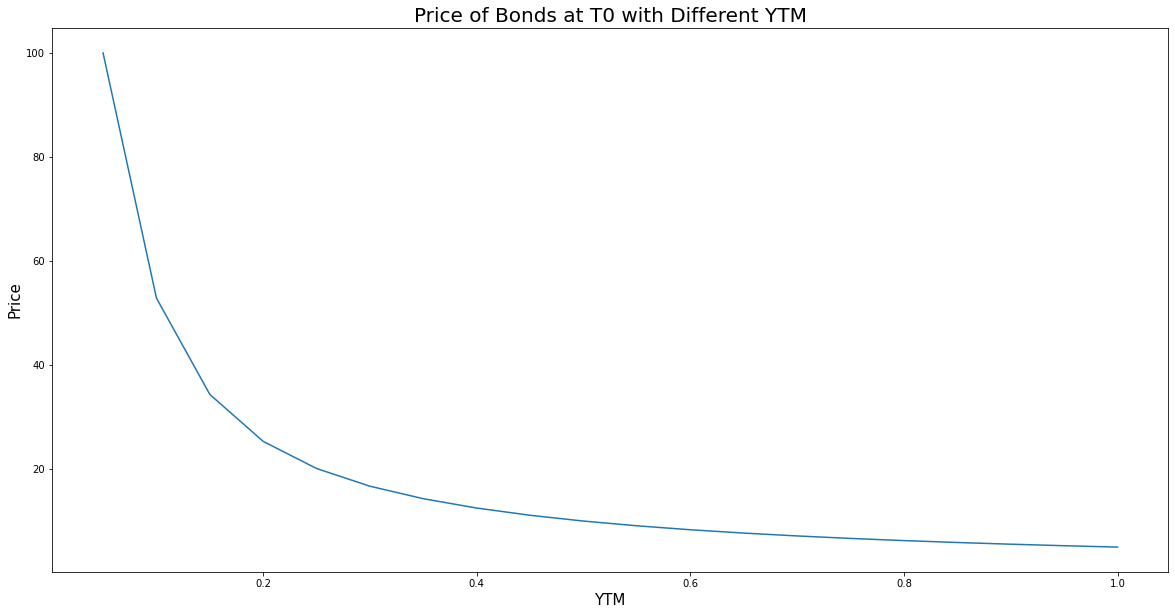

In [14]:
n=eval(input('请输入实验的债券数量：'))
#期数
T=30
#票面利率
r=0.05
#面值
C=100

price_total=[]
return_total=np.linspace(1/n,1,n)

for i in range(1,n+1):
    Price=[]
    cash_flow_1(T,r,i/n,C)
    price_total.append(Price)
    
Frame=pd.DataFrame(price_total)
Frame.T.plot(xticks=Frame.T.index,xlabel='Days to Due',ylabel='Price',figsize=(20,10),fontsize=10)
plt.legend(return_total)
plt.xlabel('Days to Due',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Price Changes of Bonds with Different YTM',fontsize=20)
print('基本信息：期数{}，票面利率{}，面值{}。'.format(T,r,C))

plt.figure(figsize=(20,10))
Price_t0=Frame.iloc[:,0]
plt.plot(return_total,Price_t0)
plt.xlabel('YTM',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.title('Price of Bonds at T0 with Different YTM',fontsize=20)

### 2. 实验数据
    下面的数据行为到期收益率，列为时间（最长的就是到期日，0就是期初）。数值为债券价格。

In [4]:
Frame.index=return_total
Frame.head(10)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0.05,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100
0.10,52.865428,53.151970,53.467167,53.813884,54.195273,54.614800,55.076280,55.583908,56.142299,56.756529,...,71.204881,73.325369,75.657906,78.223697,81.046066,84.150673,87.565740,91.322314,95.454545,100
0.15,34.340204,34.491234,34.664919,34.864657,35.094356,35.358509,35.662286,36.011628,36.413373,36.875378,...,52.284161,55.126785,58.395803,62.155173,66.478449,71.450216,77.167749,83.742911,91.304348,100
0.20,25.315954,25.379145,25.454974,25.545969,25.655162,25.786195,25.943434,26.132120,26.358544,26.630253,...,39.535502,42.442603,45.931124,50.117348,55.140818,61.168981,68.402778,77.083333,87.500000,100
0.25,20.099035,20.123794,20.154743,20.193428,20.241785,20.302231,20.377789,20.472237,20.590296,20.737870,...,30.737418,33.421773,36.777216,40.971520,46.214400,52.768000,60.960000,71.200000,84.000000,100
0.30,16.698473,16.708015,16.720420,16.736546,16.757510,16.784763,16.820191,16.866249,16.926123,17.003960,...,24.524966,26.882456,29.947193,33.931351,39.110756,45.843983,54.597178,65.976331,80.769231,100
0.35,14.296259,14.299950,14.304932,14.311659,14.320739,14.332998,14.349547,14.371888,14.402049,14.442767,...,20.040767,22.055035,24.774298,28.445302,33.401157,40.091562,49.123609,61.316872,77.777778,100
0.40,12.503615,12.505062,12.507086,12.509921,12.513889,12.519445,12.527223,12.538112,12.553357,12.574700,...,16.735023,18.429032,20.800644,24.120902,28.769263,35.276968,44.387755,57.142857,75.000000,100
0.45,11.112393,11.112970,11.113806,11.115019,11.116777,11.119327,11.123024,11.128385,11.136158,11.147429,...,14.248262,15.659980,17.706972,20.675109,24.978908,31.219416,40.268154,53.388823,72.413793,100
0.50,10.000469,10.000704,10.001056,10.001584,10.002376,10.003564,10.005346,10.008019,10.012029,10.018044,...,12.341107,13.511660,15.267490,17.901235,21.851852,27.777778,36.666667,50.000000,70.000000,100


### 3. 实验结果
    从第一张图可以看出，到期收益率越大（线越靠下），价格越低。
    从第二张图可以看出，函数具有凸性，因此到期收益率下降带来的收益大于上升的损失（控制收益率变化幅度）。

# 定理三：票面利率与债券价格波动幅度成反比

# 定理四：到期时间与债券价格的波动幅度成正比

# 定理五：随着债券到期时间的临近，价格波动幅度以递增的速度减少

### 1. 可视化
    需要使用者输入债券的数量，程序会根据债券的数量将票面利率在0-1之间等分。债券的其他参数也可以调整，在下面的程序前四行调整即可。
    
    Y轴表示因为到期收益率变化债券价格上升或者下降的百分比，X轴代表期限，越大到期时间越近。不同曲线代表不同票面利率值。

请输入实验的债券数量：20
基本信息：期数30，到期收益率0.05，到期收益率波动幅度0.04，面值100。


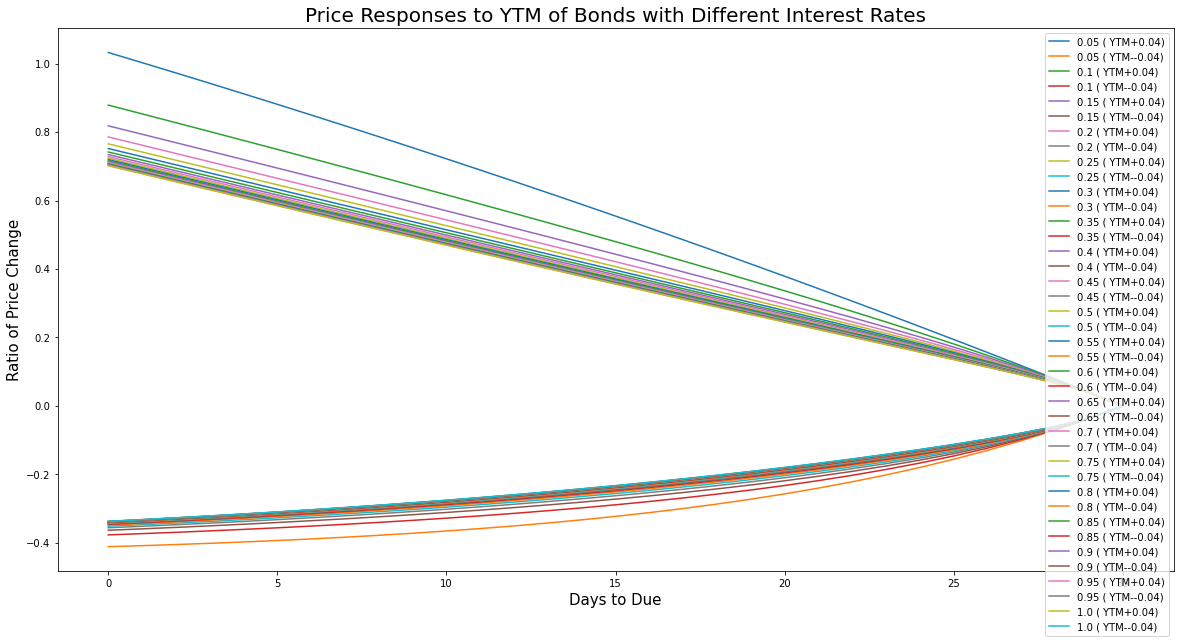

In [5]:
n=eval(input('请输入实验的债券数量：'))
#期数
T=30
#到期收益率下限
r0=0.01
#到期收益率
r=0.05
#到期收益率上限
r1=0.09
#面值
C=100


price_total=[]
Days=np.linspace(0,T+1,T+1)

Rise_total=[]
Drop_total=[]
for i in range(1,n+1):
    R=[]
    for j in np.array([r0,r,r1]):
        Price=[]
        cash_flow_1(T,i/n,j,C)
        price_total.append(Price)
        R.append(np.array(Price))
    Rise=(R[0]-R[1])/R[1]
    Drop=(R[2]-R[1])/R[1]
    Rise_total.append(Rise)
    Drop_total.append(Drop)

L=[]
return_total=np.linspace(1/n,1,n)
plt.figure(figsize=(20,10))
for i in range(0,len(Rise_total)):
    plt.plot(Rise_total[i])
    L.append(str(round(return_total[i],2))+' ('+' YTM+'+str(round(r-r0,2))+')')
    plt.plot(Drop_total[i])
    L.append(str(round(return_total[i],2))+' ('+' YTM-'+str(round(r-r1,2))+')')
plt.xticks=Days
plt.legend(L)

plt.xlabel('Days to Due',fontsize=15)
plt.ylabel('Ratio of Price Change',fontsize=15)
plt.title('Price Responses to YTM of Bonds with Different Interest Rates',fontsize=20)
print('基本信息：期数{}，到期收益率{}，到期收益率波动幅度{}，面值{}。'.format(T,r,r-r0,C))

### 2. 实验数据
    下面的数据行为票面利率，列为时间（最长的就是到期日，0就是期初）。数值为价格变化幅度（相较于到期收益率没有变化的）。

In [6]:
Frame1=pd.DataFrame(Rise_total)
Frame1.index=return_total
print("债券价格上升幅度")
Frame1.head(10)

债券价格上升幅度


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0.05,1.032308,1.002631,0.972658,0.942384,0.911808,0.880926,0.849735,0.818233,0.786415,0.754279,...,0.342641,0.306067,0.269128,0.231819,0.194137,0.156079,0.117639,0.078816,0.039604,0.0
0.10,0.878690,0.853057,0.827307,0.801438,0.775448,0.749334,0.723090,0.696712,0.670195,0.643531,...,0.306591,0.276225,0.245260,0.213600,0.181126,0.147694,0.113123,0.077189,0.039604,0.0
0.15,0.818145,0.793563,0.768929,0.744243,0.719506,0.694717,0.669874,0.644976,0.620020,0.595002,...,0.285519,0.258099,0.230141,0.201515,0.172046,0.141504,0.109574,0.075817,0.039604,0.0
0.20,0.785753,0.761607,0.737438,0.713250,0.689043,0.664819,0.640579,0.616323,0.592049,0.567758,...,0.271696,0.245921,0.219706,0.192912,0.165349,0.136746,0.106710,0.074644,0.039604,0.0
0.25,0.765583,0.741662,0.717736,0.693808,0.669881,0.645956,0.622036,0.598121,0.574214,0.550314,...,0.261930,0.237176,0.212069,0.186476,0.160206,0.132976,0.104352,0.073631,0.039604,0.0
0.30,0.751815,0.728028,0.704247,0.680475,0.656715,0.632970,0.609242,0.585535,0.561850,0.538188,...,0.254664,0.230592,0.206239,0.181480,0.156133,0.129915,0.102375,0.072746,0.039604,0.0
0.35,0.741818,0.718119,0.694432,0.670762,0.647111,0.623484,0.599884,0.576313,0.552775,0.529271,...,0.249046,0.225456,0.201642,0.177490,0.152826,0.127379,0.100695,0.071967,0.039604,0.0
0.40,0.734230,0.710591,0.686970,0.663370,0.639797,0.616252,0.592741,0.569266,0.545830,0.522437,...,0.244574,0.221337,0.197924,0.174228,0.150089,0.125245,0.099249,0.071275,0.039604,0.0
0.45,0.728273,0.704679,0.681106,0.657558,0.634040,0.610556,0.587109,0.563704,0.540344,0.517032,...,0.240928,0.217961,0.194855,0.171513,0.147786,0.123423,0.097992,0.070657,0.039604,0.0
0.50,0.723473,0.699912,0.676375,0.652867,0.629391,0.605953,0.582556,0.559204,0.535902,0.512651,...,0.237900,0.215143,0.192279,0.169218,0.145820,0.121851,0.096888,0.070102,0.039604,0.0


In [7]:
Frame2=pd.DataFrame(Drop_total)
Frame2.index=return_total
print("债券价格下降幅度")
Frame2.head(10)

债券价格下降幅度


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0.05,-0.410946,-0.407931,-0.404645,-0.401063,-0.397159,-0.392903,-0.388264,-0.383208,-0.377697,-0.371690,...,-0.239810,-0.221393,-0.201318,-0.179437,-0.155586,-0.129589,-0.101252,-0.070364,-0.036697,0.0
0.10,-0.376500,-0.372823,-0.368928,-0.364798,-0.360417,-0.355765,-0.350822,-0.345567,-0.339973,-0.334013,...,-0.217973,-0.202404,-0.185361,-0.166636,-0.145977,-0.123079,-0.097565,-0.068967,-0.036697,0.0
0.15,-0.362923,-0.358859,-0.354583,-0.350082,-0.345343,-0.340351,-0.335089,-0.329541,-0.323686,-0.317504,...,-0.205209,-0.190869,-0.175253,-0.158145,-0.139271,-0.118273,-0.094667,-0.067790,-0.036697,0.0
0.20,-0.355660,-0.351358,-0.346845,-0.342108,-0.337135,-0.331913,-0.326428,-0.320665,-0.314607,-0.308236,...,-0.196835,-0.183120,-0.168275,-0.152100,-0.134326,-0.114579,-0.092329,-0.066783,-0.036697,0.0
0.25,-0.351137,-0.346677,-0.342003,-0.337105,-0.331971,-0.326589,-0.320946,-0.315027,-0.308818,-0.302301,...,-0.190920,-0.177556,-0.163170,-0.147579,-0.130528,-0.111652,-0.090404,-0.065913,-0.036697,0.0
0.30,-0.348050,-0.343477,-0.338689,-0.333675,-0.328424,-0.322924,-0.317164,-0.311129,-0.304805,-0.298176,...,-0.186519,-0.173366,-0.159272,-0.144068,-0.127519,-0.109275,-0.088790,-0.065153,-0.036697,0.0
0.35,-0.345808,-0.341151,-0.336277,-0.331175,-0.325836,-0.320248,-0.314397,-0.308272,-0.301859,-0.295142,...,-0.183116,-0.170098,-0.156198,-0.141264,-0.125078,-0.107307,-0.087419,-0.064484,-0.036697,0.0
0.40,-0.344107,-0.339384,-0.334443,-0.329274,-0.323865,-0.318206,-0.312285,-0.306089,-0.299605,-0.292818,...,-0.180407,-0.167477,-0.153712,-0.138973,-0.123056,-0.105650,-0.086238,-0.063890,-0.036697,0.0
0.45,-0.342771,-0.337996,-0.333002,-0.327778,-0.322314,-0.316599,-0.310620,-0.304367,-0.297824,-0.290979,...,-0.178199,-0.165329,-0.151661,-0.137065,-0.121355,-0.104235,-0.085212,-0.063360,-0.036697,0.0
0.50,-0.341695,-0.336878,-0.331840,-0.326571,-0.321061,-0.315300,-0.309274,-0.302973,-0.296382,-0.289489,...,-0.176364,-0.163536,-0.149938,-0.135453,-0.119904,-0.103015,-0.084311,-0.062883,-0.036697,0.0


### 3. 实验结果
    从图中任意一个x（期限）截面都可以看到，债券票面利率越大，价格受到到期收益率扰动的程度越大。
    从图中任意一条（组）曲线可以看到，随着期限的临近，债券波动幅度下降，最后为0，并且减小的速度递增。
    